In [1]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.model_selection import train_test_split

import pandas, xgboost, numpy, textblob, string, codecs
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score as asc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import average_precision_score
from collections import defaultdict
import matplotlib.pylab as plt
import datetime
import numpy as np
import tqdm

Using TensorFlow backend.


In [2]:
file = codecs.open( "SampleEng2learn_clear.txt", "r", "utf-8" )
learn = file.read()
file .close()
file = codecs.open( "SampleEng2test_clear.txt", "r", "utf-8" )
test = file.read()
file .close()

In [3]:
def preprocess():
    file = codecs.open( "SampleEng2learn_clear.txt", "r", "utf-8" )
    learn = file.read()
    file .close()
    file = codecs.open( "SampleEng2test_clear.txt", "r", "utf-8" )
    test = file.read()
    file .close()
    
    
    ids, texts, subj, ipv, grnti = [], [], [], [], []
    for i, line in enumerate(learn.split("\n")):
        content=line.split("	")
        ids.append(content[0])
        texts.append(content[1])
        subj.append(content[2].split('\\')[0])
        ipv.append(content[3].split('\\')[0])
        grnti.append(content[4].split('\\')[0].split("\r")[0])        
    ids_t_s, texts_t_s, subj_t_s, ipv_t_s, grnti_t_s = [], [], [], [], []
    for i, line in enumerate(test.split("\n")):
        content=line.split("	")
        ids_t_s.append(content[0])
        texts_t_s.append(content[1])
        subj_t_s.append(content[2])
        ipv_t_s.append(content[3])
        grnti_t_s.append(content[4].split("\r")[0])
        ids_t_h, texts_t_h, subj_t_h, ipv_t_h, grnti_t_h = [], [], [], [], []
    for i, line in enumerate(test.split("\n")):
        content=line.split("	")
        ids_t_h.append(content[0])
        texts_t_h.append(content[1])
        subj_t_h.append(content[2].split('\\')[0])
        ipv_t_h.append(content[3].split('\\')[0])
        grnti_t_h.append(content[4].split('\\')[0].split("\r")[0])
        
    trainDF = pandas.DataFrame()
    testDF_s = pandas.DataFrame()
    testDF_h = pandas.DataFrame()
    trainDF['ids'] = ids
    trainDF['text'] = texts
    trainDF['subj'] = subj
    trainDF['ipv'] = ipv
    trainDF['grnti'] = grnti
    testDF_s['ids'] = ids_t_s
    testDF_s['text'] = texts_t_s
    testDF_s['subj'] = subj_t_s
    testDF_s['ipv'] = ipv_t_s
    testDF_s['grnti'] = grnti_t_s
    testDF_h['ids'] = ids_t_h
    testDF_h['text'] = texts_t_h
    testDF_h['subj'] = subj_t_h
    testDF_h['ipv'] = ipv_t_h
    testDF_h['grnti'] = grnti_t_h

    return trainDF,testDF_s,testDF_h

    

In [4]:
def choose():
    #Вывод названий алгоритмов для выбора пользователем
    print(' Выберите номера желаемых методов классификации','\n',"1- К-ближайших соседей(KNeighborsClassifier)",'\n','2- Логистическая регрессия(LogisticRegression)','\n',
    '3- Стохастический градиентный спуск (SGDClassifier)','\n','4- Рандомный лес (RandomForestClassifier)','\n',
    '5- Мультиномиальный наивный байес (MultinomialNB)')
    b=[]
    r = [1,2,3,4,5]
    #Цикл для выбора пользователем алгоритмов
    while True:
        try:
            a = input()
            if a == '':
                break
            elif int(a) not in r or int(a) in b:
                print('Введите цифру, соответствующую алгоритму. Цифры не должны повторяться')
            else:
                b.append(int(a))
        except ValueError:
            print('Введите цифру')
    return b

In [5]:
#Функция обучения алгоримов 
def engine(string,trainDF,testDF):
    learn={}
    train={}
    predictions={}


    for i in tqdm.tqdm_notebook(string):
        clf = list_of_algorithms_2[i]
        text_clf = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('clf', clf)
        ])
        time=datetime.datetime.now()
        text_clf.fit(trainDF['text'], trainDF['ipv'])
        learn_t=datetime.datetime.now()
        learn[list_of_algorithms_2[i]]=learn_t-time
        predictions[list_of_algorithms_2[i]]=text_clf.predict(testDF['text'])
        train[list_of_algorithms_2[i]]=datetime.datetime.now()-learn_t
        
    return predictions,learn,train

In [6]:
def pri(predictions,testDF_s,testDF_h):
    hard=[]
    soft=[]
    for p in predictions.values():
        hard.append(np.mean(p == testDF_h['ipv']))   
        correct=0
        incorrect=0
        for i,j in zip(p,testDF_s['ipv']):
            if i in j:
                correct+=1
            else:
                incorrect+=1
        soft.append(correct/len(p))
    return hard,soft 

In [7]:
def obr(string,testDF_h,predictions,learn,train):
    m={}
    for i in string:
        lst=list(precision_recall_fscore_support(testDF_h[['ipv']], predictions[list_of_algorithms_2[i]],\
                                                 average='weighted'))
        lst.append([learn[list_of_algorithms_2[i]],train[list_of_algorithms_2[i]]])
        m[list_of_algorithms_2[i]]=lst
        m_sort = sorted(m.items(), key=lambda a: a[1][2],reverse=True )
    return m_sort


In [8]:
def visualization(string,m,predictions):  
    
    X = []
    m_new = []
    for i in m:
        m_new.append(i[1][2])
    for i in range(len(m)):
        X.append(i+1)
    plt.bar(X, m_new,color='orange',xerr=0.55,ecolor='g')
    plt.show()
    c=1
    for i in m:
        print(c,' - ',i[0],"\n","\n","Точность данного алгортима = ",i[1][0],"\n","Полнота данного алгортима = ",i[1][1],'\n',
              "Fмера данного алгортима = ",i[1][2],'\n',"Время обчения = ", i[1][4][0],'\n',"Время работы = ",i[1][4][1],'\n')
        c+=1
        

 Выберите номера желаемых методов классификации 
 1- К-ближайших соседей(KNeighborsClassifier) 
 2- Логистическая регрессия(LogisticRegression) 
 3- Стохастический градиентный спуск (SGDClassifier) 
 4- Рандомный лес (RandomForestClassifier) 
 5- Мультиномиальный наивный байес (MultinomialNB)
5



C:\Users\GJLEB\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


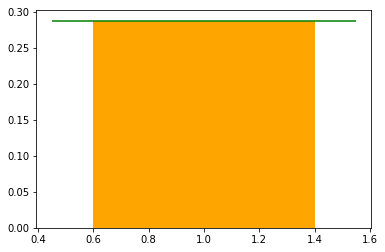

1  -  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) 
 
 Точность данного алгортима =  0.43442679483900976 
 Полнота данного алгортима =  0.3528574790850932 
 Fмера данного алгортима =  0.2875980846264278 
 Время обчения =  0:00:36.021831 
 Время работы =  0:00:10.912955 



In [9]:

list_of_algorithms_2={
                      1:KNeighborsClassifier(),2:LogisticRegression(),
                      3:SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None),
                      4:RandomForestClassifier(),5:MultinomialNB()
                     }
#Запуск программы
trainDF = pandas.DataFrame()
testDF_s = pandas.DataFrame()
testDF_h = pandas.DataFrame()
trainDF,testDF_s,testDF_h = preprocess()

algs = choose()

#Запуск классификации
predictions,learn,train = engine(algs,trainDF,testDF_s)




#Проверка на значение, превышающее 1
m= obr (algs,testDF_h,predictions,learn,train)


visualization(algs,m,predictions)
